In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

In [3]:
train_lr_dir = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Working\train\Pixelated"
train_hr_dir = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Working\train\Original"
test_lr_dir = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Working\test\Pixelated"
test_hr_dir = r"C:\Users\betti\Downloads\Mini_project_Image\Dataset_images\Image_Processing\Working\test\Original"

In [5]:
def load_images(lr_dir, hr_dir, img_size=(96, 96), max_images=200):
    lr_images, hr_images = [], []
    filenames = os.listdir(lr_dir)[:max_images]
    for fname in filenames:
        lr_path = os.path.join(lr_dir, fname)
        hr_path = os.path.join(hr_dir, fname)
        if os.path.exists(hr_path):
            lr = load_img(lr_path, target_size=img_size)
            hr = load_img(hr_path, target_size=img_size)
            lr_images.append(img_to_array(lr) / 255.)
            hr_images.append(img_to_array(hr) / 255.)
    return np.array(lr_images), np.array(hr_images)

x_train, y_train = load_images(train_lr_dir, train_hr_dir)
x_test, y_test = load_images(test_lr_dir, test_hr_dir)

In [7]:
def res_block(x_in, num_filters):
    x = Conv2D(num_filters, 3, padding='same', activation='relu')(x_in)
    x = Conv2D(num_filters, 3, padding='same')(x)
    return Add()([x_in, x])

def edsr_model(num_filters=64, num_res_blocks=8, input_shape=(96, 96, 3)):
    inp = Input(shape=input_shape)
    x = Conv2D(num_filters, 3, padding='same')(inp)
    skip_connection = x
    for _ in range(num_res_blocks):
        x = res_block(x, num_filters)
    x = Add()([x, skip_connection])
    x = Conv2D(3, 3, padding='same')(x)
    model = Model(inputs=inp, outputs=x)
    return model

In [9]:
model = edsr_model()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=8)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - loss: 3.7033 - mae: 0.8667 - val_loss: 0.0406 - val_mae: 0.1460
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0300 - mae: 0.1196 - val_loss: 0.0178 - val_mae: 0.0856
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - loss: 0.0183 - mae: 0.0832 - val_loss: 0.0147 - val_mae: 0.0721
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0149 - mae: 0.0746 - val_loss: 0.0139 - val_mae: 0.0704
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0138 - mae: 0.0687 - val_loss: 0.0140 - val_mae: 0.0714
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0135 - mae: 0.0690 - val_loss: 0.0126 - val_mae: 0.0630
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - loss: 0.0128 - mae: 0.0626 - val_loss: 0.0123 - val_mae: 0.0628
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - loss: 0.0133 - mae: 0.0659 - val_loss: 0.0121 - val_mae: 0.0593
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - loss: 0.0129 - mae: 

In [11]:
model.save('C:/Users/betti/Downloads/Mini_project_Image/edsr_model.keras')

In [13]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0113 - mae: 0.0617
Test MAE: 0.0633


In [15]:
def plot_result(lr, sr, hr):
    plt.figure(figsize=(12,4))
    titles = ['Pixelated (LR)', 'Super-Resolved', 'Original (HR)']
    images = [lr, sr, hr]
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


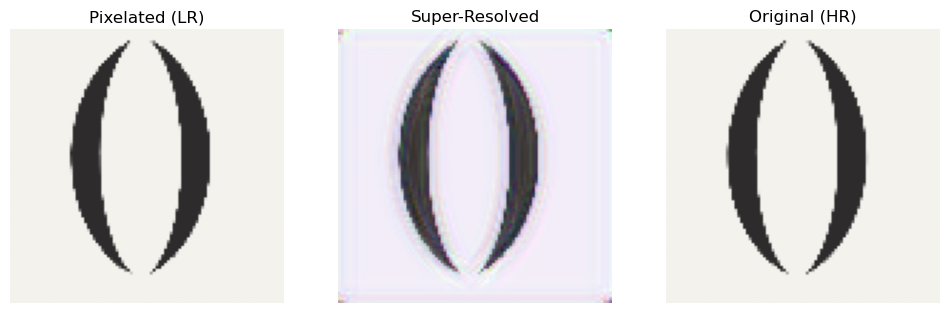

In [17]:
idx = 0
sr_img = model.predict(np.expand_dims(x_test[idx], axis=0))[0]
plot_result(x_test[idx], sr_img, y_test[idx])

In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# Define path to the specific image
img_name = "Human (128).jpg"
lr_path = os.path.join(train_lr_dir, img_name)
hr_path = os.path.join(train_hr_dir, img_name)

# Ensure image size matches your model's input shape
img_size = (96, 96)

# Load and preprocess the pixelated image
lr_img = load_img(lr_path, target_size=img_size)
lr_array = img_to_array(lr_img) / 255.0
lr_input = np.expand_dims(lr_array, axis=0)

# Predict super-resolved image
sr_img = model.predict(lr_input)[0]  # Shape: (96, 96, 3)

# Load the original HR image for comparison
hr_img = load_img(hr_path, target_size=img_size)
hr_array = img_to_array(hr_img) / 255.0

# Plot all three images
plot_result(lr_array, sr_img, hr_array)


ImportError: cannot import name 'float8_e4m3b11fnuz' from 'tensorflow.python.framework.dtypes' (C:\Users\betti\anaconda3\Lib\site-packages\tensorflow\python\framework\dtypes.py)